In [2]:
import torch
import os
import matplotlib.pyplot as plt

In [11]:
artifact_number = 8000
artifacts_files = os.listdir("models")
model_file = f"models/{artifacts_files[artifact_number]}/{artifacts_files[artifact_number]}"

loaded_checkpoint = torch.load(model_file)
# in_channels = 3
# model = ImpalaModel(in_channels = observation_shape[0])
# policy = CategoricalPolicy(model, False, 15)
# if "state_dict" in loaded_checkpoint:
#     policy.load_state_dict(loaded_checkpoint['state_dict'])
# elif "model_state_dict" in loaded_checkpoint:
#     policy.load_state_dict(loaded_checkpoint['model_state_dict'])
# policy.to(device)
conv_layer = loaded_checkpoint['state_dict']['embedder.block1.conv.weight']
print(conv_layer.shape)

torch.Size([16, 3, 3, 3])


In [14]:
for layer in loaded_checkpoint['state_dict'].keys():
    print(layer)

embedder.block1.conv.weight
embedder.block1.conv.bias
embedder.block1.res1.conv1.weight
embedder.block1.res1.conv1.bias
embedder.block1.res1.conv2.weight
embedder.block1.res1.conv2.bias
embedder.block1.res2.conv1.weight
embedder.block1.res2.conv1.bias
embedder.block1.res2.conv2.weight
embedder.block1.res2.conv2.bias
embedder.block2.conv.weight
embedder.block2.conv.bias
embedder.block2.res1.conv1.weight
embedder.block2.res1.conv1.bias
embedder.block2.res1.conv2.weight
embedder.block2.res1.conv2.bias
embedder.block2.res2.conv1.weight
embedder.block2.res2.conv1.bias
embedder.block2.res2.conv2.weight
embedder.block2.res2.conv2.bias
embedder.block3.conv.weight
embedder.block3.conv.bias
embedder.block3.res1.conv1.weight
embedder.block3.res1.conv1.bias
embedder.block3.res1.conv2.weight
embedder.block3.res1.conv2.bias
embedder.block3.res2.conv1.weight
embedder.block3.res2.conv1.bias
embedder.block3.res2.conv2.weight
embedder.block3.res2.conv2.bias
embedder.fc.weight
embedder.fc.bias
fc_policy.

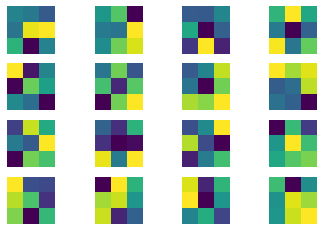

In [12]:
# loop through all 16 filters
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(conv_layer[i][0].cpu().detach().numpy())
    plt.axis('off')
plt.show()

In [16]:
import numpy as np

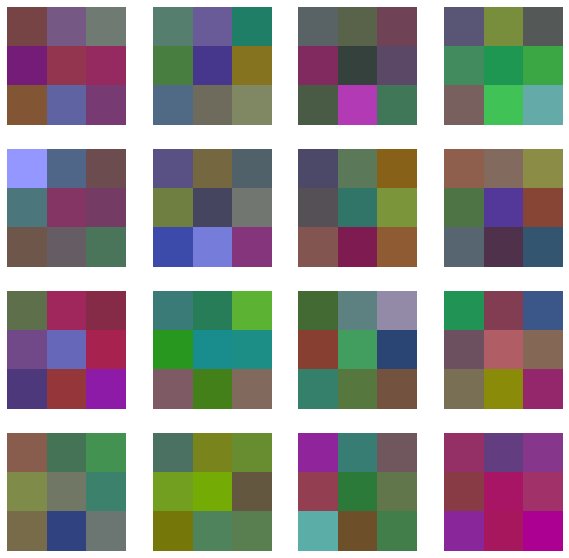

In [17]:
# Normalize the filters
min_val = torch.min(conv_layer)
range_val = torch.max(conv_layer) - min_val
normalized_filters = (conv_layer - min_val) / range_val

# Plot the filters
fig, axes = plt.subplots(4, 4, figsize=(10,10)) # Adjust the subplot grid as needed
for i, ax in enumerate(axes.flat):
    filter = normalized_filters[i].cpu().numpy()
    filter = np.transpose(filter, (1, 2, 0))  # Rearrange the dimensions to (H, W, C)
    ax.imshow(filter)
    ax.axis('off')
plt.show()

In [19]:
from tqdm import tqdm

In [20]:
for artifact_number in tqdm(range(8000)):
    artifacts_files = os.listdir("models")
    model_file = f"models/{artifacts_files[artifact_number]}/{artifacts_files[artifact_number]}"
    loaded_checkpoint = torch.load(model_file)
    conv_layer = loaded_checkpoint['state_dict']['embedder.block1.conv.weight']
    
    # Normalize the filters
    min_val = torch.min(conv_layer)
    range_val = torch.max(conv_layer) - min_val
    normalized_filters = (conv_layer - min_val) / range_val

    # Plot the filters
    fig, axes = plt.subplots(4, 4, figsize=(10,10)) # Adjust the subplot grid as needed
    for i, ax in enumerate(axes.flat):
        filter = normalized_filters[i].cpu().numpy()
        filter = np.transpose(filter, (1, 2, 0))  # Rearrange the dimensions to (H, W, C)
        ax.imshow(filter)
        ax.axis('off')
    os.makedirs("filters", exist_ok=True)
    plt.savefig(f"filters/{artifact_number}.png")
    plt.close()

100%|██████████| 8000/8000 [39:28<00:00,  3.38it/s]   


In [7]:
artifact_number = 6697
artifacts_files = os.listdir("models/model_133971968.pth")
print(artifacts_files)
model_file = f"models/{artifacts_files[artifact_number]}/{artifacts_files[artifact_number]}"
loaded_checkpoint = torch.load(model_file)
conv_layer = loaded_checkpoint['state_dict']['embedder.block1.conv.weight']


['model_133971968.pth']


IndexError: list index out of range

# More general visualization

In [6]:
param_names = [
    'embedder.block1.conv.weight', 'embedder.block1.conv.bias',
    'embedder.block1.res1.conv1.weight', 'embedder.block1.res1.conv1.bias',
    'embedder.block1.res1.conv2.weight', 'embedder.block1.res1.conv2.bias',
    'embedder.block1.res2.conv1.weight', 'embedder.block1.res2.conv1.bias',
    'embedder.block1.res2.conv2.weight', 'embedder.block1.res2.conv2.bias',
    'embedder.block2.conv.weight', 'embedder.block2.conv.bias',
    'embedder.block2.res1.conv1.weight', 'embedder.block2.res1.conv1.bias',
    'embedder.block2.res1.conv2.weight', 'embedder.block2.res1.conv2.bias',
    'embedder.block2.res2.conv1.weight', 'embedder.block2.res2.conv1.bias',
    'embedder.block2.res2.conv2.weight', 'embedder.block2.res2.conv2.bias',
    'embedder.block3.conv.weight', 'embedder.block3.conv.bias',
    'embedder.block3.res1.conv1.weight', 'embedder.block3.res1.conv1.bias',
    'embedder.block3.res1.conv2.weight', 'embedder.block3.res1.conv2.bias',
    'embedder.block3.res2.conv1.weight', 'embedder.block3.res2.conv1.bias',
    'embedder.block3.res2.conv2.weight', 'embedder.block3.res2.conv2.bias',
    'embedder.fc.weight', 'embedder.fc.bias',
    'fc_policy.weight', 'fc_policy.bias',
    'fc_value.weight', 'fc_value.bias'
]

In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm


# Base directory where the model checkpoints are stored
base_checkpoint_dir = 'models'

# Function to recursively get all checkpoint files
def get_all_checkpoints(directory, file_list):
    for item in os.listdir(directory):
        full_path = os.path.join(directory, item)
        if os.path.isdir(full_path):
            get_all_checkpoints(full_path, file_list)
        elif item.endswith('.pth'):
            file_list.append(full_path)

# Retrieve all checkpoint paths
all_checkpoint_paths = []
get_all_checkpoints(base_checkpoint_dir, all_checkpoint_paths)
all_checkpoint_paths.sort()

# Data structure to store parameter norms
param_norms = {name: [] for name in param_names}

# Iterate over each checkpoint
for checkpoint_path in tqdm(all_checkpoint_paths, desc="checkpoints"):
    try:
        checkpoint = torch.load(checkpoint_path, map_location='cpu')
    except:
        print(f"Could not load {checkpoint_path}")
        continue
    
    for name in param_names:
        # Extract parameter tensor
        param_tensor = checkpoint['state_dict'][name]
        # Compute the Frobenius norm of the parameter
        param_norm = torch.norm(param_tensor, p='fro').item()
        # Store the norm
        param_norms[name].append(param_norm)

checkpoints:   5%|▍         | 376/8057 [00:00<00:14, 532.64it/s]

checkpoints:  24%|██▍       | 1966/8057 [00:03<00:11, 526.47it/s]

Could not load models/model_133971968.pth/model_133971968.pth


checkpoints: 100%|██████████| 8057/8057 [00:15<00:00, 536.99it/s]


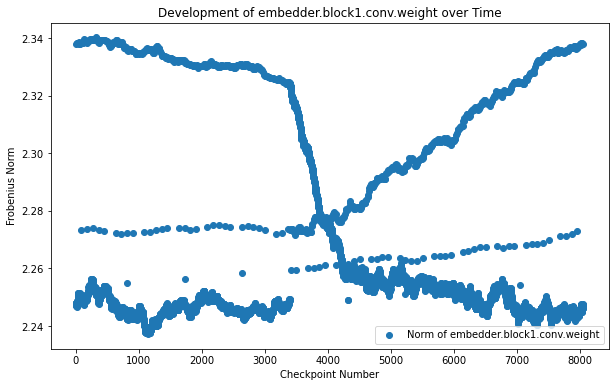

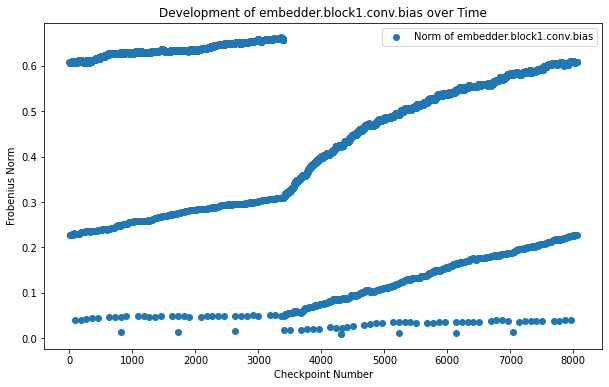

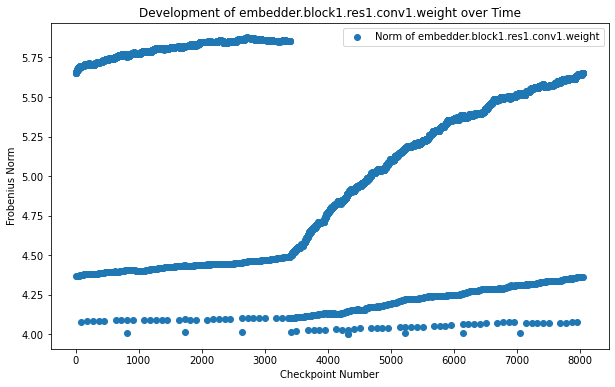

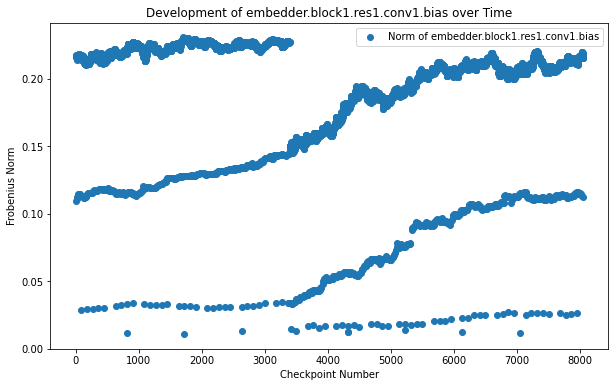

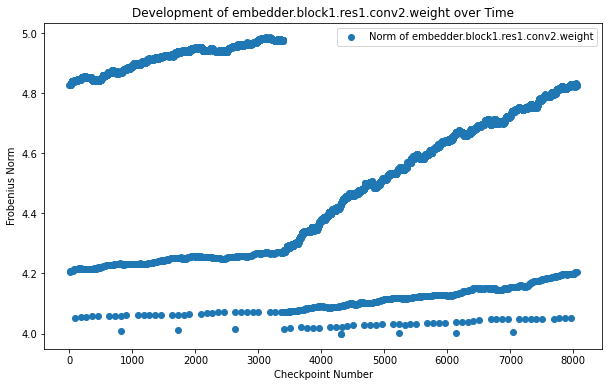

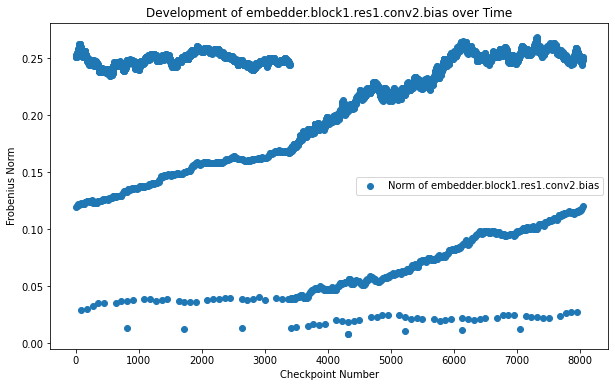

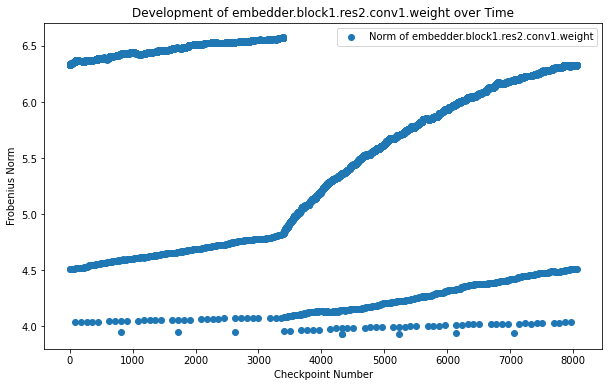

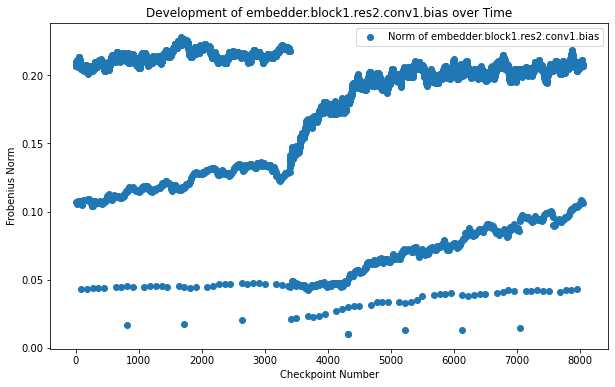

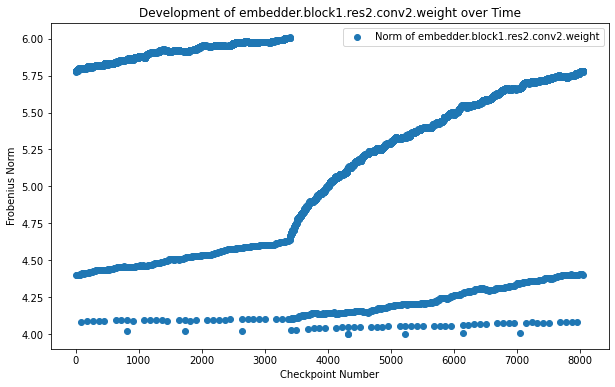

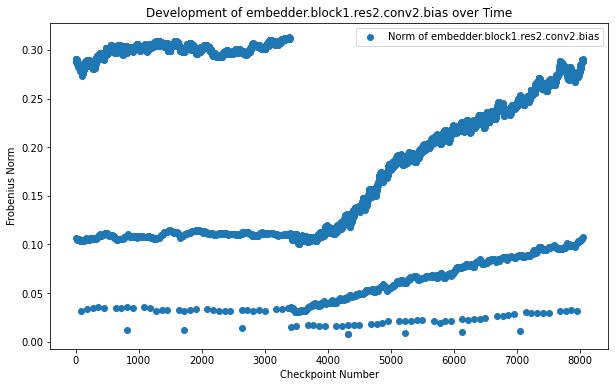

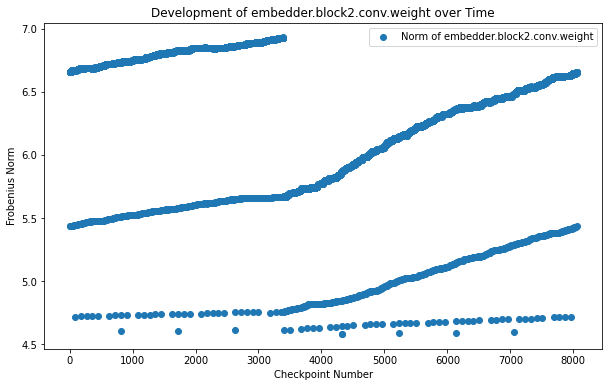

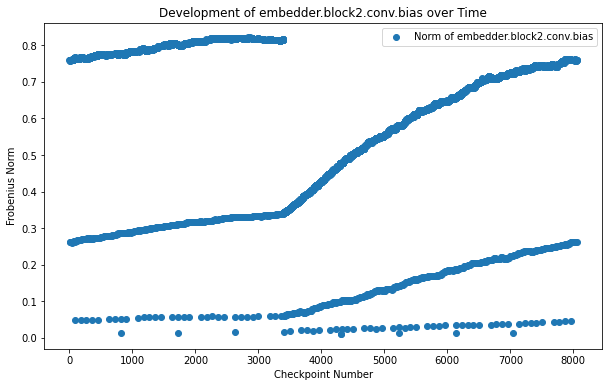

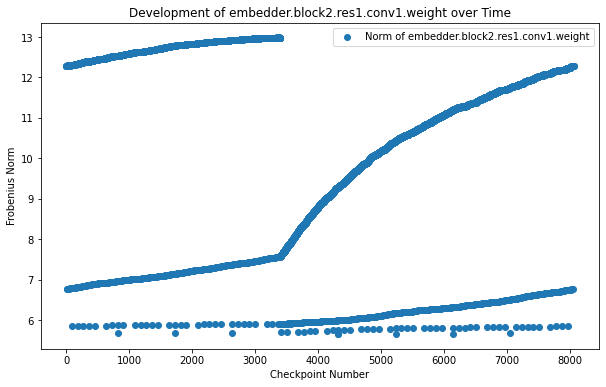

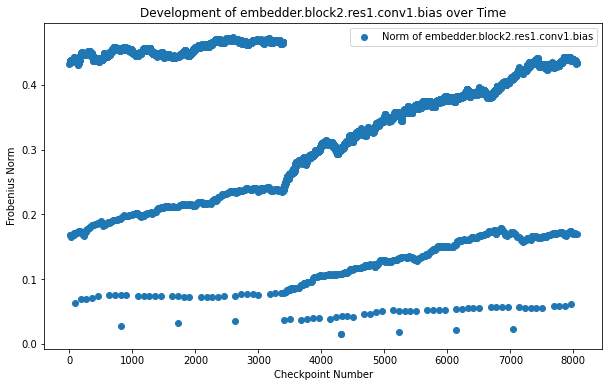

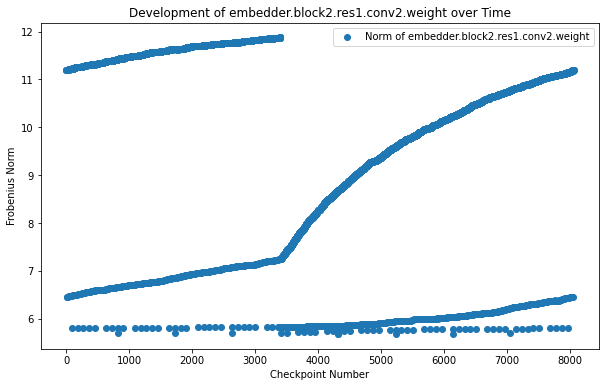

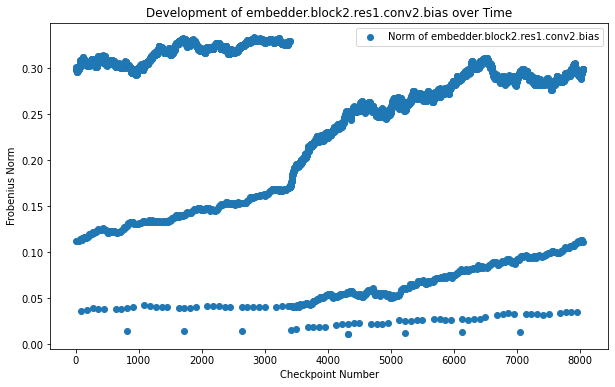

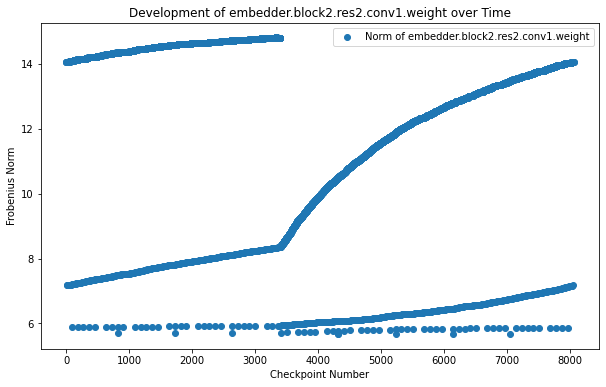

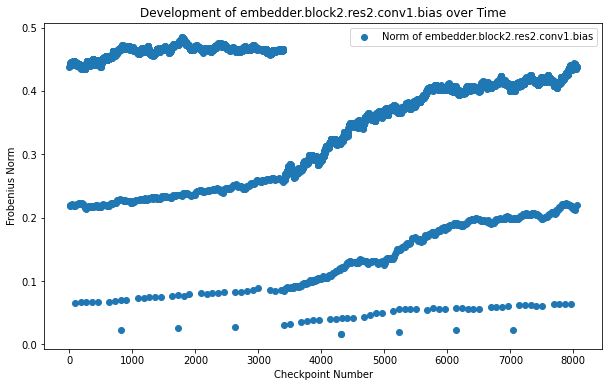

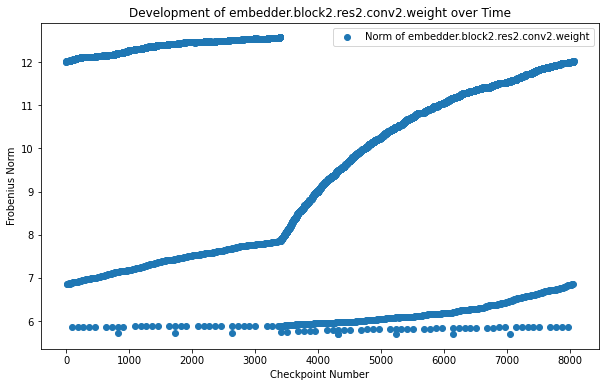

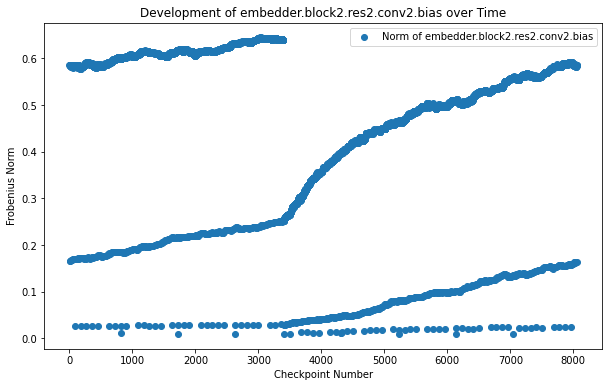

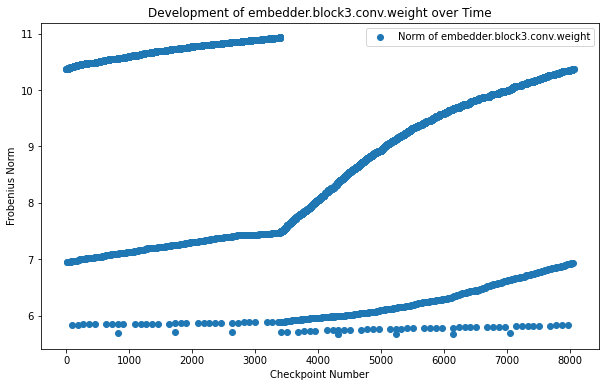

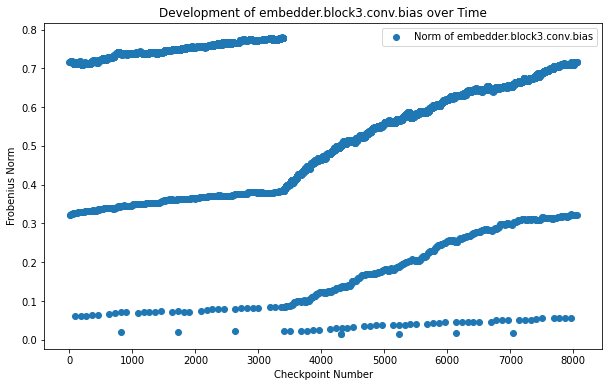

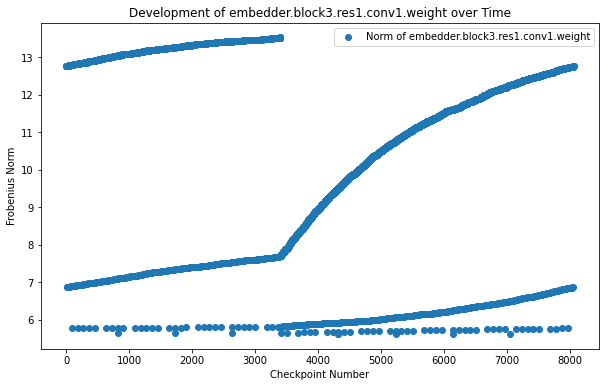

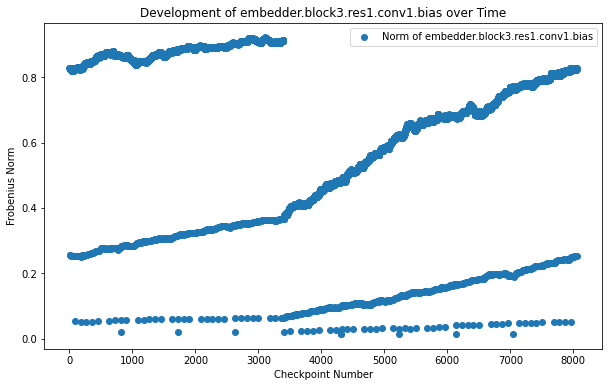

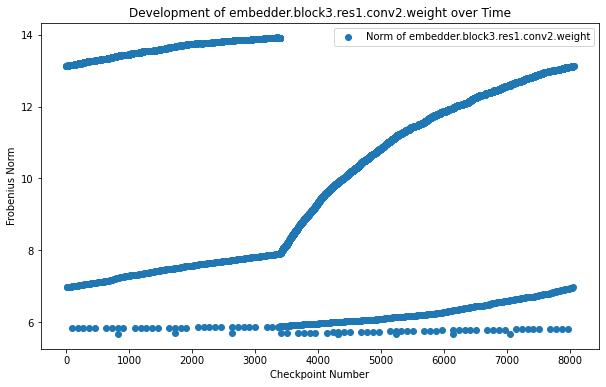

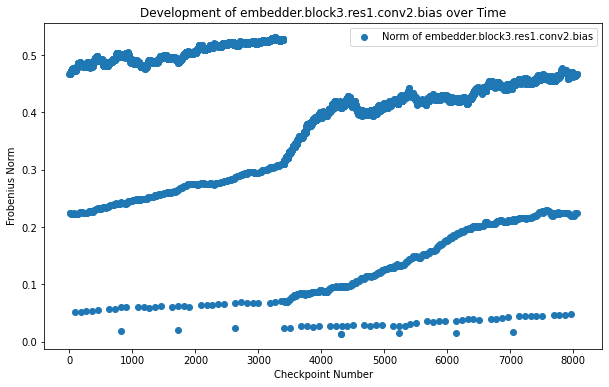

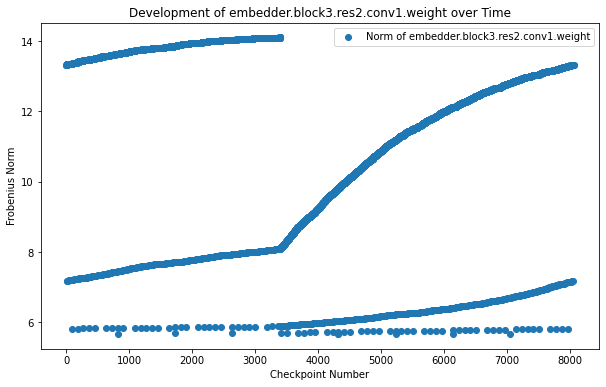

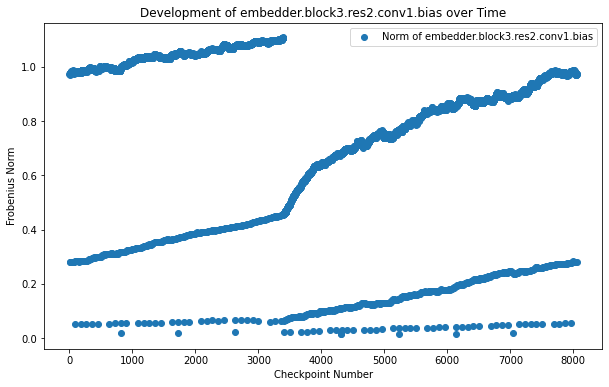

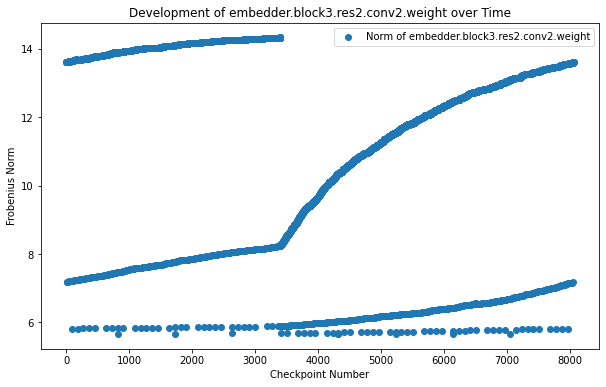

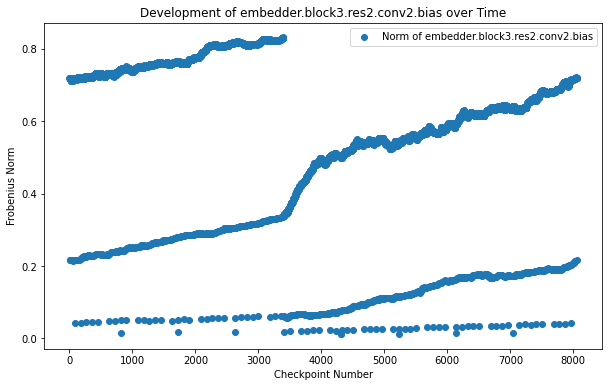

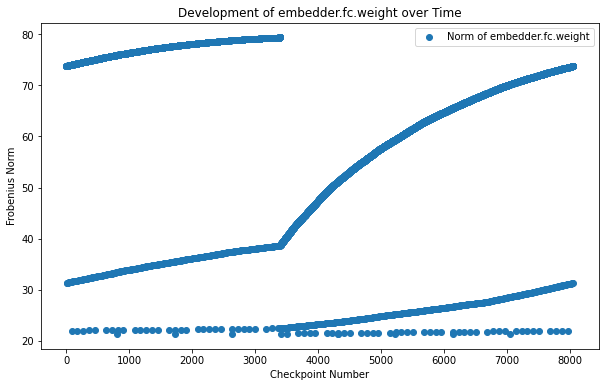

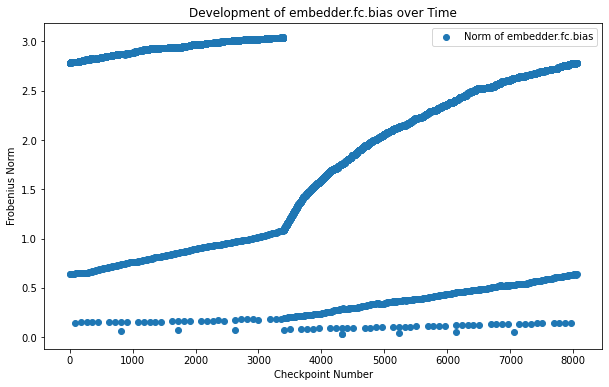

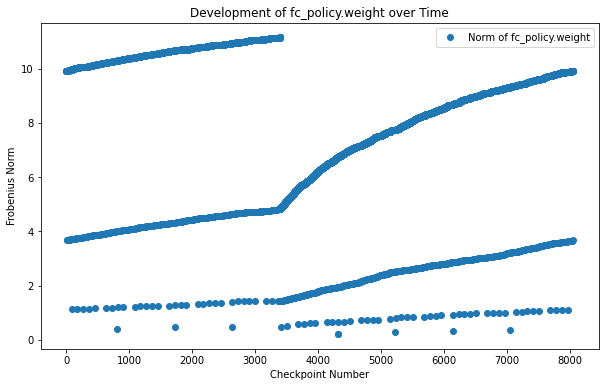

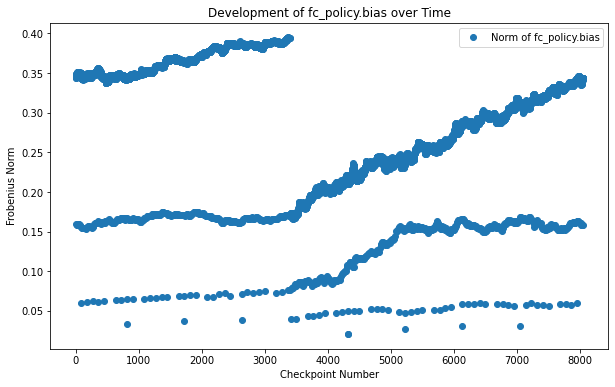

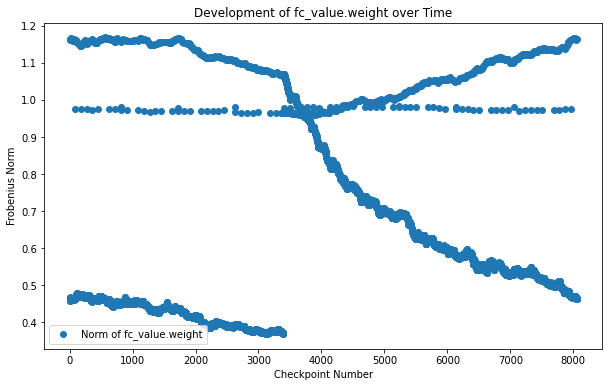

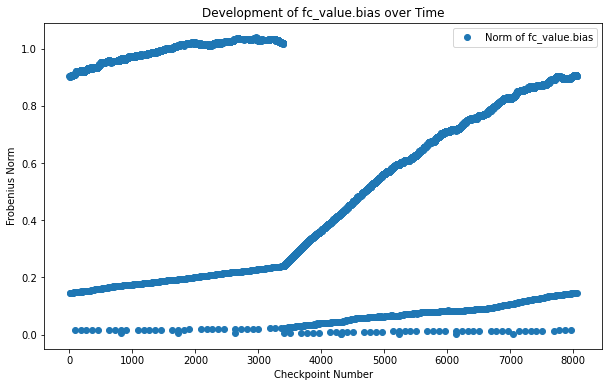

In [9]:
for name in param_names:
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(param_norms[name])), param_norms[name], label=f'Norm of {name}')
    plt.xlabel('Checkpoint Number')
    plt.ylabel('Frobenius Norm')
    plt.title(f'Development of {name} over Time')
    plt.legend()
    plt.show()
    # os.makedirs("plots/layer_frobenius_norms", exist_ok=True)
    # plt.savefig(f"plots/layer_frobenius_norms/frobenius_norm_of_{name}.png")
    # plt.close()